# **Forecasting Antimalarial Drug Needs**

**Brief description of each of the features of our dataset:**

1. ISO: ISO code representing the country

2. Countries and Area: Names of the countries and areas included in the dataset.

3. UNICEF Reporting Region: The region as classified by UNICEF for reporting purposes.

4. UNICEF Programme Region: The region as classified by UNICEF for programmatic purposes.

5. World Bank Income Group (2022): The income group classification of countries according to the World Bank's criteria for the year 2022. These groups typically include low-income, lower-middle-income, upper-middle-income, and high-income countries.

6. Year: The year of data collection or reporting.

7. Short Source: Abbreviated source of the data.

8. Long Source: Detailed source or reference of the data.

9. National: Indicates whether the data is at the national level.

10. Sex: The data under this category represents percentages or rates for males and females separately. For example, the first row might indicate that 4.4% of males and 5.3% of females are included in this particular dataset.

11. Area:This column indicates whether the data pertains to rural or urban areas within the country. For example, in the first row, it suggests that 3.6% of the data is from rural areas and 6.6% is from urban areas.

11. WIQ: Wealth Index Quintile. This represents a categorization of the population into five groups based on their wealth or socioeconomic status (richest quintile, second richest, etc.).

12. Mother's Education: Information regarding the level of education attained by mothers, which can be a crucial factor in child health outcomes.

Objectives:
Accurate Demand Forecasting:
Develop models to predict antimalarial drug demand considering climate, socio-economic factors, and healthcare policies.
AI-Driven Insights:
Use AI to analyze historical data and extract insights on drug demand fluctuations and regional variations.
Precision Enhancement:
Refine forecasting methods using machine learning to minimize prediction errors.
Methodology:
Data Collection:
Gather data from UNICEF and other sources focusing on malaria-related indicators, population demographics, and healthcare infrastructure.
Data Analysis and Modeling:
Explore and train various machine learning models using historical data and cross-validation techniques.
Intervention Assessment:
Evaluate and assess the impact of potential interventions on malaria incidence and drug demand.
Solution Deployment:
Propose strategies for deploying forecasting models in real-world scenarios and collaborate with relevant stakeholders.
Expected Outcomes:
Reliable estimates of antimalarial drug demand for better decision-making and resource allocation.
AI-driven insights to guide targeted interventions, potentially reducing child mortality rates.
Data Preparation Steps:
Given the project's focus on forecasting and AI-driven insights, the data needs to be meticulously prepared. Here's the proposed plan for data preparation:

Data Cleaning:
Handle missing values and inconsistencies.
Remove irrelevant or redundant data.
Feature Engineering:
Derive new features that could be significant predictors of drug demand, such as seasonal trends or interaction terms between demographics and healthcare infrastructure.
Data Transformation:
Normalize or standardize data where necessary to prepare it for machine learning models.

In [ ]:
import pandas as pd

# Load the dataset from the Excel file
file_path = 'MLRACT.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1', header=1)

# Display the first few rows of the dataset to understand its structure
print(data.head())

  Unnamed: 0   Unnamed: 1                   Unnamed: 2 Unnamed: 3  \
0        AFG  Afghanistan                   South Asia       ROSA   
1        AGO       Angola  Eastern and Southern Africa      ESARO   
2        AGO       Angola  Eastern and Southern Africa      ESARO   
3        AGO       Angola  Eastern and Southern Africa      ESARO   
4        BDI      Burundi  Eastern and Southern Africa      ESARO   

            Unnamed: 4  Unnamed: 5     Unnamed: 6  \
0           Low income        2015       DHS 2015   
1  Lower middle income        2007  MIS 2006-2007   
2  Lower middle income        2011       MIS 2011   
3  Lower middle income        2016  DHS 2015-2016   
4           Low income        2010       DHS 2010   

                                Unnamed: 7  Unnamed: 8  Male  ...  Rural  \
0       Demographic and Health Survey 2015         4.4   5.3  ...    6.6   
1       Malaria Indicator Survey 2006-2007         5.5   NaN  ...    NaN   
2            Malaria Indicator Survey 

**Observations:**

* The dataset contains columns for country identifiers, regional classifications, income groups, and survey details.
* There are columns for both genders and different residential areas (rural and urban).
* Some columns have missing data, especially towards the end of the row.

**Data Cleaning Steps:**
1. Rename Columns: Some columns are unnamed and need proper labeling for clarity.
2. Handle Missing Values: Decide on a strategy to handle or impute missing data.

In [ ]:
# Rename columns for clarity
data.columns = ['ISO', 'Country', 'Region_UNICEF', 'Programme_Region', 'Income_Group', 'Year', 'Short_Source', 'Long_Source', 'National', 'Male', 'Female', 'Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest', 'Mothers_Education_None', 'Mothers_Education_Primary', 'Mothers_Education_Sec_Higher']

# Display the renamed dataframe
print(data.head())

   ISO      Country                Region_UNICEF Programme_Region  \
0  AFG  Afghanistan                   South Asia             ROSA   
1  AGO       Angola  Eastern and Southern Africa            ESARO   
2  AGO       Angola  Eastern and Southern Africa            ESARO   
3  AGO       Angola  Eastern and Southern Africa            ESARO   
4  BDI      Burundi  Eastern and Southern Africa            ESARO   

          Income_Group  Year   Short_Source  \
0           Low income  2015       DHS 2015   
1  Lower middle income  2007  MIS 2006-2007   
2  Lower middle income  2011       MIS 2011   
3  Lower middle income  2016  DHS 2015-2016   
4           Low income  2010       DHS 2010   

                               Long_Source  National  Male  ...  Rural  Urban  \
0       Demographic and Health Survey 2015       4.4   5.3  ...    6.6    0.2   
1       Malaria Indicator Survey 2006-2007       5.5   NaN  ...    NaN    NaN   
2            Malaria Indicator Survey 2011      21.7  20.8 

**Given the nature of the data, we can consider the following strategies for handling missing values:**

* Imputation: For numerical columns like 'Male', 'Female', 'Rural', etc., we can impute missing values using the median or mean, depending on the distribution.
* Removal: If a row has a significant number of missing values across crucial columns, it might be more beneficial to remove it.

We will proceed with imputing missing values using the median for numerical columns.

In [ ]:
# Impute missing values using the median for numerical columns
columns_to_impute = ['National', 'Male', 'Female', 'Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest']
for column in columns_to_impute:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# Display the dataframe after imputation
print(data.head())

   ISO      Country                Region_UNICEF Programme_Region  \
0  AFG  Afghanistan                   South Asia             ROSA   
1  AGO       Angola  Eastern and Southern Africa            ESARO   
2  AGO       Angola  Eastern and Southern Africa            ESARO   
3  AGO       Angola  Eastern and Southern Africa            ESARO   
4  BDI      Burundi  Eastern and Southern Africa            ESARO   

          Income_Group  Year   Short_Source  \
0           Low income  2015       DHS 2015   
1  Lower middle income  2007  MIS 2006-2007   
2  Lower middle income  2011       MIS 2011   
3  Lower middle income  2016  DHS 2015-2016   
4           Low income  2010       DHS 2010   

                               Long_Source  National  Male  ...  Rural  Urban  \
0       Demographic and Health Survey 2015       4.4   5.3  ...    6.6    0.2   
1       Malaria Indicator Survey 2006-2007       5.5  28.0  ...   28.9   28.8   
2            Malaria Indicator Survey 2011      21.7  20.8 

In [ ]:
#Save the excel file
data.to_excel('MLRACT_cleaned.xlsx', index=False)

Now, we will move forward with the Analysis:

1. **Trend Analysis:**
Plot the trend of antimalarial drug demand over the years for different income groups or regions.

2. **Distribution Analysis:**
Histograms or box plots to show the distribution of drug demand across different countries or income groups.

3. **Comparison Analysis:**
  * Bar charts to compare drug demand between males and females across different regions.
  *Bar charts to compare urban vs rural drug demand.

4. **Correlation Analysis:**
Heatmaps to show correlations between different numerical variables like drug demand in urban vs rural areas.

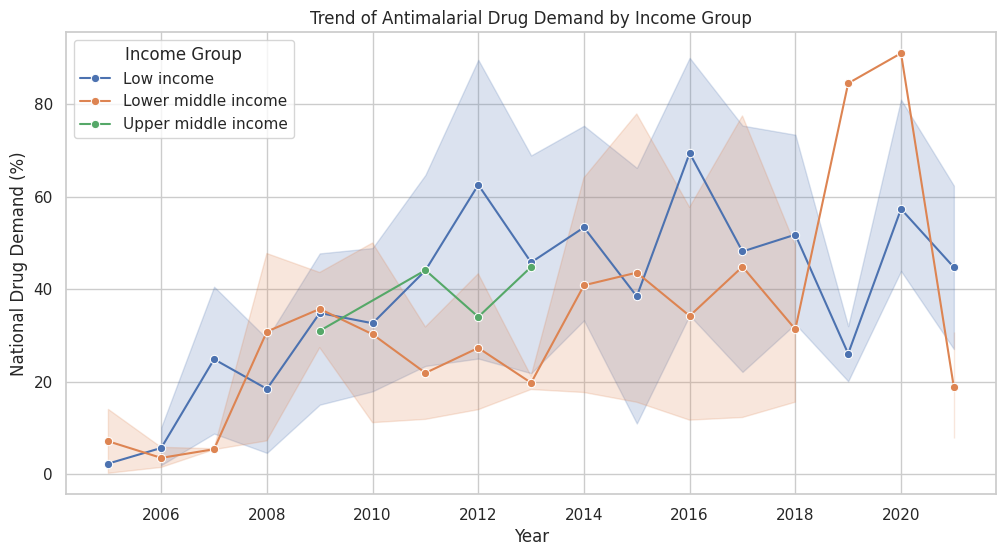

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a line plot for trend analysis over the years by income group
plt.figure(figsize=(12, 6), facecolor='white')
ax = sns.lineplot(data=data, x='Year', y='National', hue='Income_Group', marker='o')
ax.set_title('Trend of Antimalarial Drug Demand by Income Group')
ax.set_xlabel('Year')
ax.set_ylabel('National Drug Demand (%)')
plt.legend(title='Income Group')
plt.show()

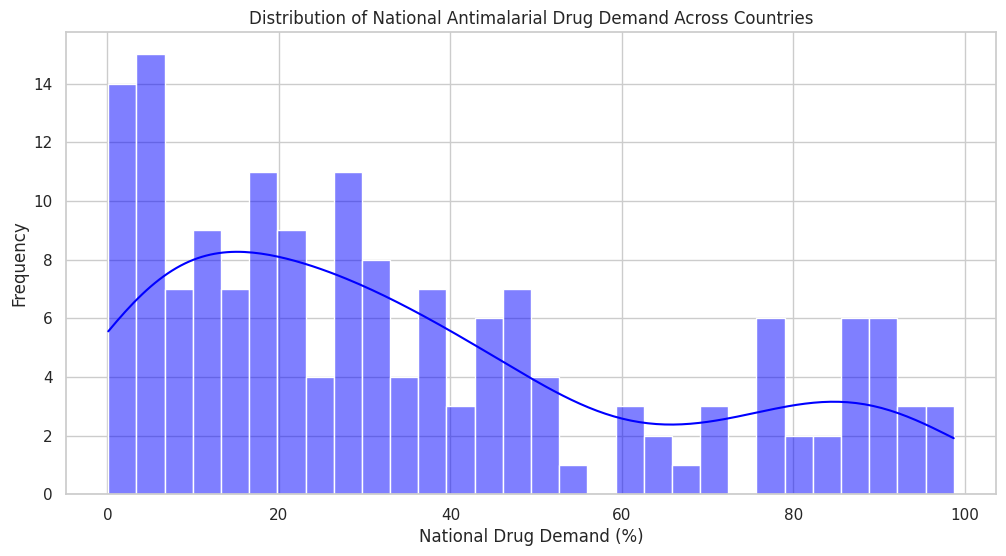

In [ ]:
# Create a histogram for the distribution of national drug demand across countries
plt.figure(figsize=(12, 6), facecolor='white')
ax = sns.histplot(data=data, x='National', bins=30, kde=True, color='blue')
ax.set_title('Distribution of National Antimalarial Drug Demand Across Countries')
ax.set_xlabel('National Drug Demand (%)')
ax.set_ylabel('Frequency')
plt.show()

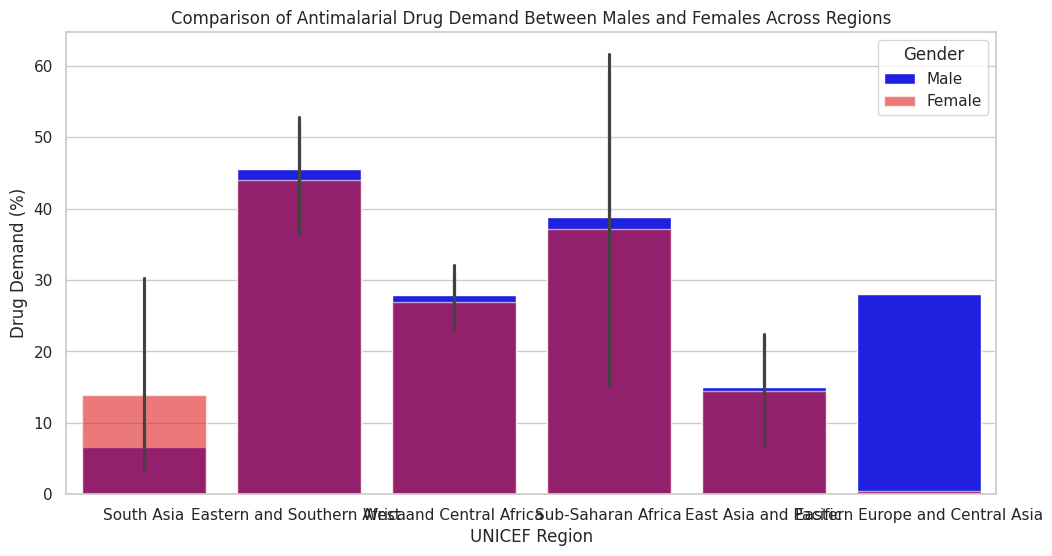

In [ ]:
# Create a bar chart to compare drug demand between males and females across different regions
plt.figure(figsize=(12, 6), facecolor='white')
ax = sns.barplot(data=data, x='Region_UNICEF', y='Male', color='blue', label='Male')
ax = sns.barplot(data=data, x='Region_UNICEF', y='Female', color='red', alpha=0.6, label='Female')
ax.set_title('Comparison of Antimalarial Drug Demand Between Males and Females Across Regions')
ax.set_xlabel('UNICEF Region')
ax.set_ylabel('Drug Demand (%)')
plt.legend(title='Gender')
plt.show()

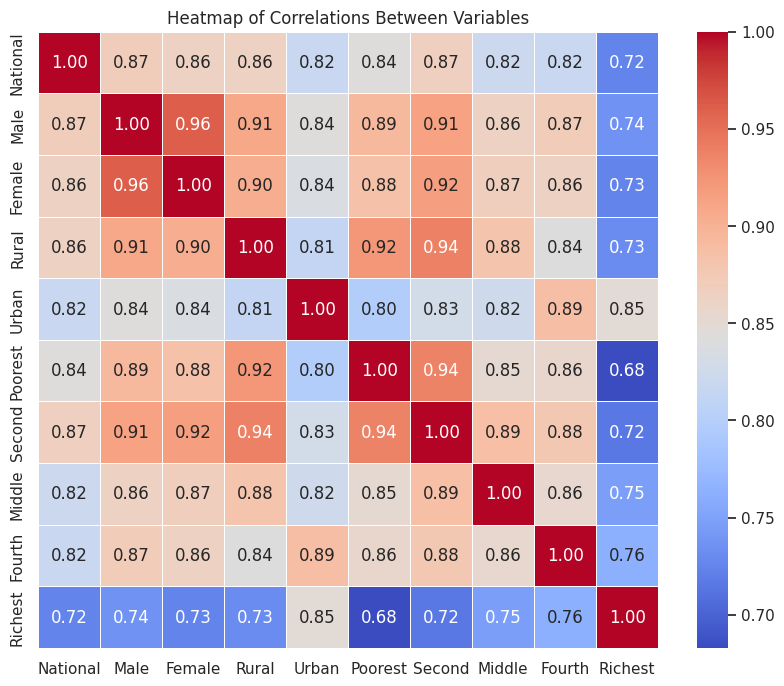

In [ ]:
import numpy as np

# Select relevant columns for correlation analysis
correlation_data = data[['National', 'Male', 'Female', 'Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest']].astype(float)

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8), facecolor='white')
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
ax.set_title('Heatmap of Correlations Between Variables')
plt.show()